https://zaynmak.github.io/posts/Perceptron/Perceptron.html

When *fit* is called, the perceptron takes random weights and starts looping until the score reaches 1, or we've done max_steps number of loops. We then take the dot product of a random observation with the weight, and if it is negative then we add that abservation to the weight, otherwise if the dot product is positive then we subtract the observation from the weight. After that we check the score of our perceptron using the *score* function, which in turn calls the *predict* function and then add the result to our history variable.


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

from perceptron import Perceptron

np.random.seed(12345)

n = 100
p_features = 3

# We start by generating a random dataset with 2 classes at opposite ends of the graph which makes it very likely for them to be linearly separable
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

# We then fit the data to the perceptron
p = Perceptron()
p.fit(X, y, max_steps = 1000)

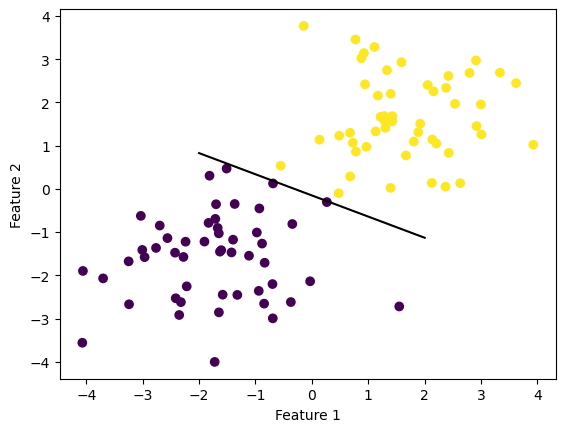

In [17]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

# We plot the data
fig = plt.scatter(X[:,0], X[:,1], c = y)
# Then plot the decision boundary
fig = draw_line(p.weight[0], -2, 2)

# And label the axes
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

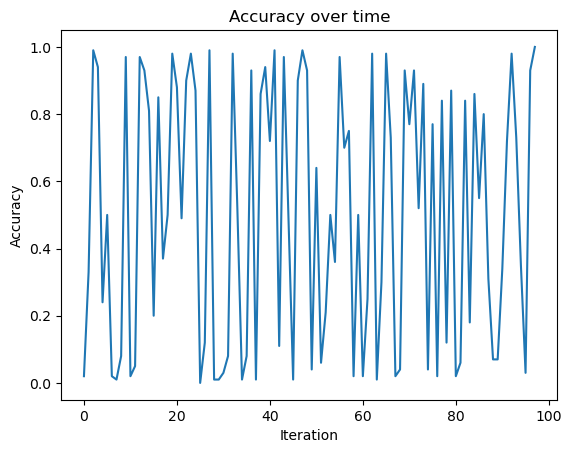

In [23]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy over time")

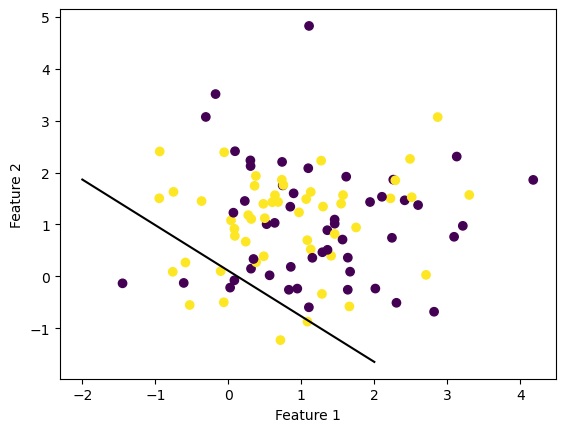

In [19]:
# We then generate a random dataset with 2 classes that are not linearly separable by having their centers be very close to each other
X2, y2 = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(1.0, 0.9), (1.0, 1.0)])

# We then fit the data to the perceptron
p2 = Perceptron()
p2.fit(X2, y2, max_steps = 1000)

# We plot the data
fig2 = plt.scatter(X2[:,0], X2[:,1], c = y2)
# Then plot the decision boundary
fig2 = draw_line(p2.weight[0], -2, 2)

# And label the axes
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

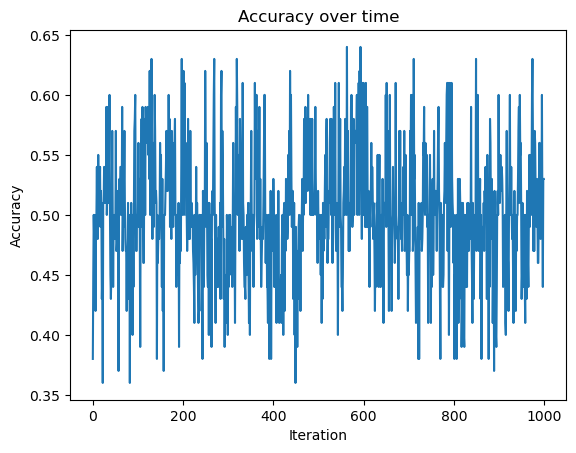

In [20]:
fig = plt.plot(p2.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy over time")

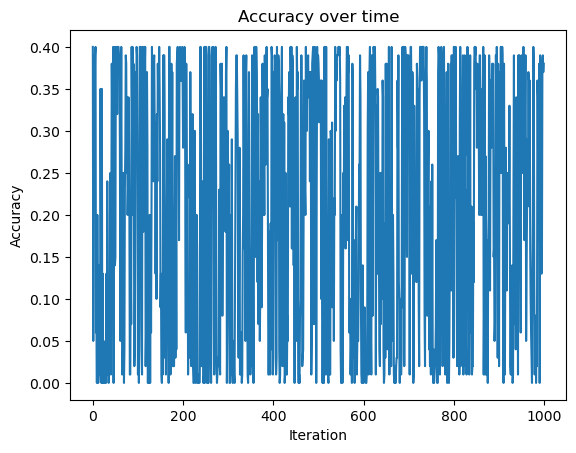

In [21]:
# We then generate a random dataset with 5 classes that are not linearly separable by having their centers be at the center and the four corners of the graph
X3, y3 = make_blobs(n_samples = 100, n_features = 5, centers = [(-1.7, -1.7), (1.7, 1.7), (1.7, -1.7), (-1.7, 1.7), (0, 0)])
# We then fit the data to the perceptron
p3 = Perceptron()
p3.fit(X3, y3, max_steps = 1000)
fig = plt.plot(p3.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy over time")
# seing how the accuracy does not history reach 1 by the end, it is not linearly separable

The run time of a single iteration of the perceptron is O(p) because the numbers of observations (data points) do not matter, since we are only doing the dot product and then adding p features to p features.